In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [3]:
with open("traces-sc128-10000-6100.bin", "rb") as f:
    N, = struct.unpack('<I', f.read(4))
    print(f"N: {N}")
    L, = struct.unpack('<I', f.read(4))
    print(f"L: {L}")
    traces = []
    for n in range(N):
        traces.append(np.array(struct.unpack('<' + 'd' * L, f.read(L * 8)), dtype=np.float64))
    traces = np.array(traces)
del f

N: 10000
L: 6100


i=1: (1500, 3000)
i=1, j=1: (1780, 1960)

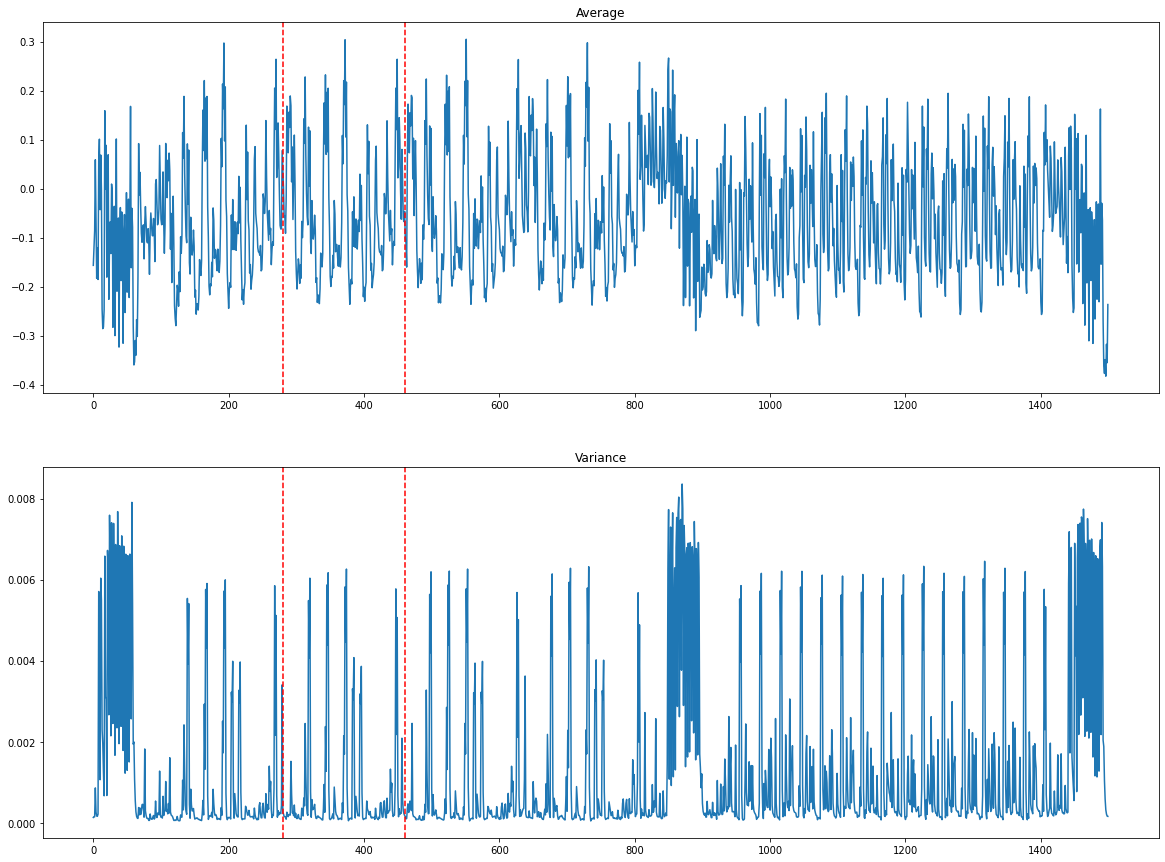

In [72]:
roiL, roiR = 1500, 3000
segL, segR = 1780, 1960
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.var(traces, axis=0, ddof=1)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

30


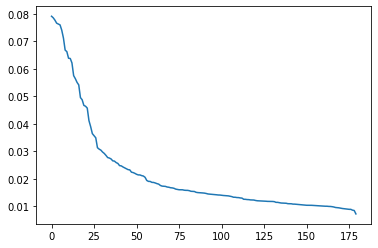

[ 94  67  40  65  92 167  38 169  93  66 105  39 116 103 114 104 115  33
  63 168  90 176  91  12 159  64  34 161  61 166  76  95  68  41 160 117
  13 106 170 108  31 154  77  43 177 150 124 145  88 144 109 149  47  35
  17  32  46  28 137  60 172 125  45  44 158 178 157 126 162  78 129 151
 110   6  62 156   0  15  89 174 146  14 155 175  19  36  74   1 179  48
  29 127 173   9  23  10 112  79 128 164   7  96 165  11 138  37  80  16
 111  73  52  30 113   2 163   8  51   3 171 130  22   4 132  81 142 148
 147  54  42 135  53  18 118 134 152 153 133  55  20 107 131 139 100  85
  72  49 143  56  24 122 123 101  50  69  98  83 140  21 120 121  25  75
  84  86  99  71  57 102   5  26 136  27  87  82 119  70 141  58  59  97]


In [24]:
sig = traces[:, segL:segR]
var = np.std(sig, ddof=1, axis=0)
max_idx = len(var[var > 0.03])
print(max_idx)
var_index = np.argsort(var)[::-1]
plt.plot(var[var_index])
plt.show()
print(var_index)

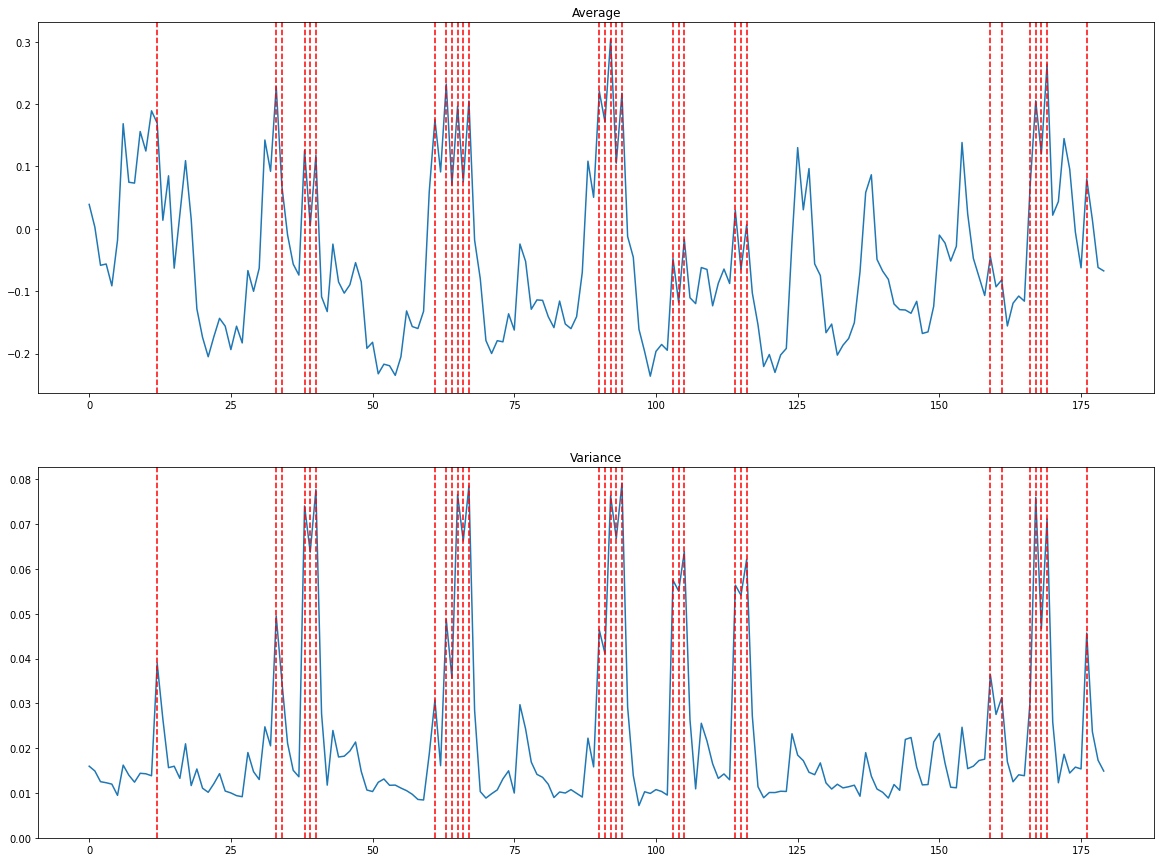

In [73]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
plt.ylim((0, plt.ylim()[1]))
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [47]:
np.array(sorted(var_index[:max_idx]))

array([ 12,  33,  34,  38,  39,  40,  61,  63,  64,  65,  66,  67,  90,
        91,  92,  93,  94, 103, 104, 105, 114, 115, 116, 159, 161, 166,
       167, 168, 169, 176])

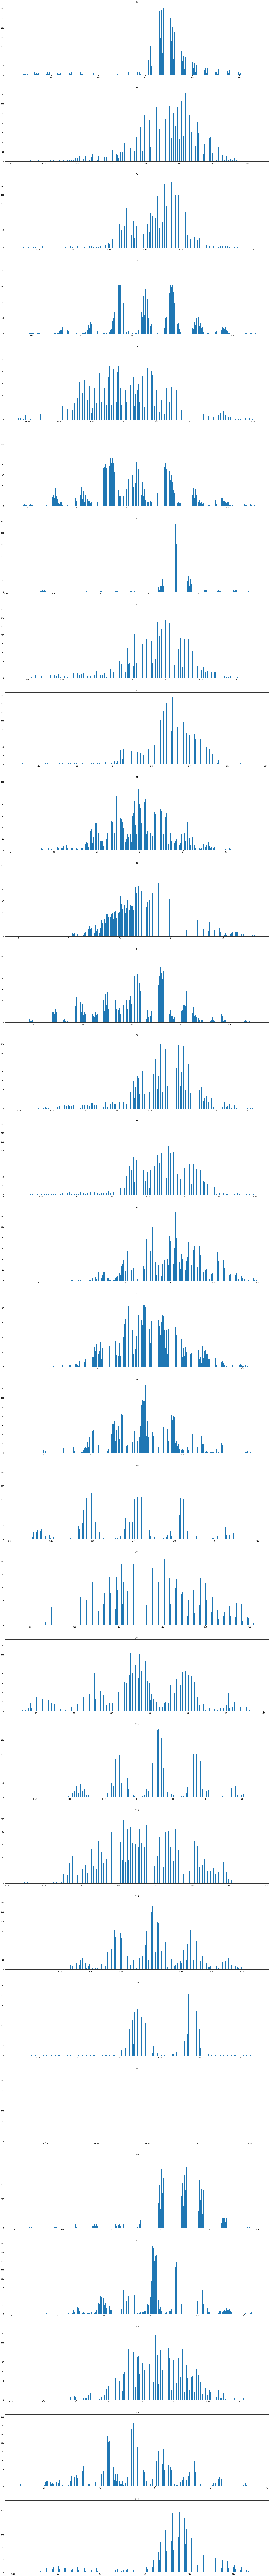

In [68]:
plt.figure(figsize=(30,10 * max_idx))
for i, idx in enumerate(sorted(var_index[:max_idx])):
    plt.subplot(max_idx, 1, i+1)
    plt.hist(sig[:,idx], bins=1000)
    plt.title(idx)
plt.show()

# XOR Analysis

In [29]:
print(var_index[:max_idx])

[ 94  67  40  65  92 167  38 169  93  66 105  39 116 103 114 104 115  33
  63 168  90 176  91  12 159  64  34 161  61 166]


In [32]:
sig = traces[:, segL: segR]

<AxesSubplot:>

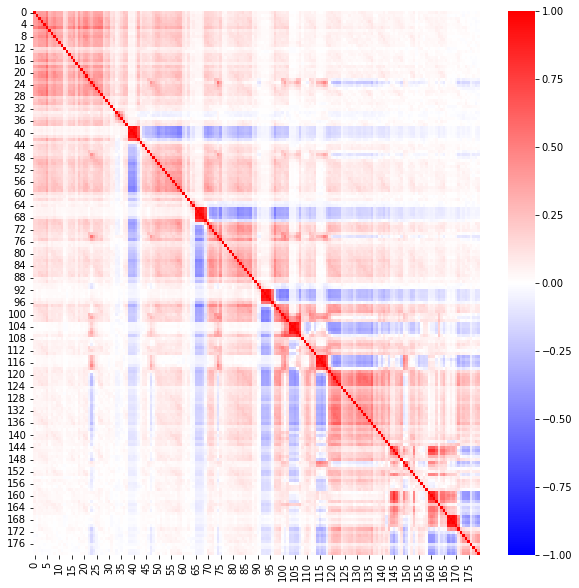

In [44]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T), vmin=-1, vmax=1, cmap='bwr')

<AxesSubplot:>

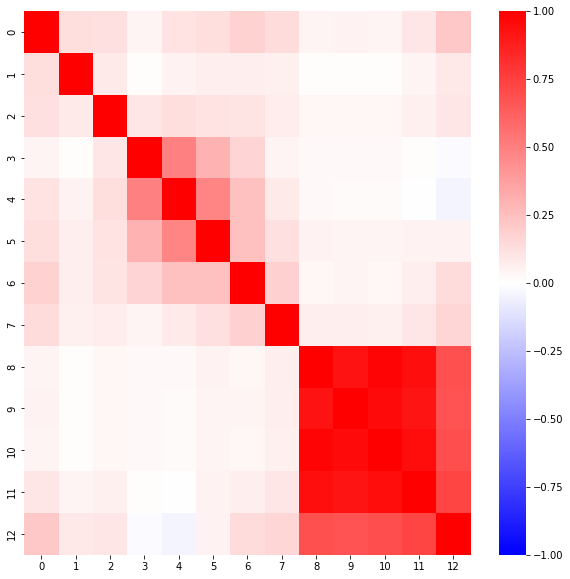

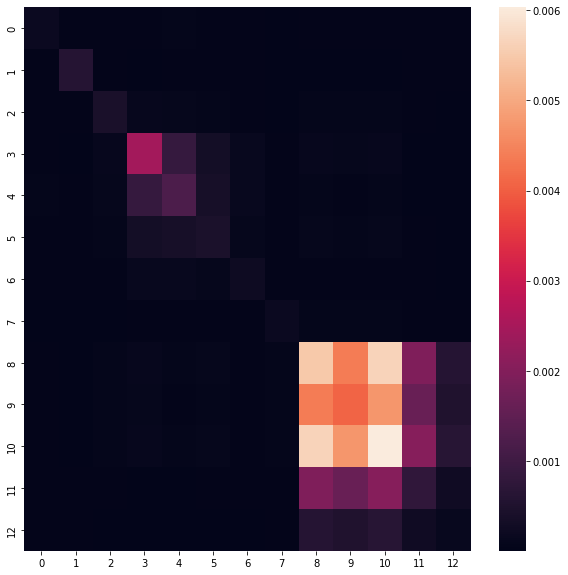

In [67]:
import seaborn as sns
heatmap_roi = slice(30, 43)
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T[heatmap_roi]), vmin=-1, vmax=1, cmap='bwr')
plt.figure(figsize=(10, 10))
sns.heatmap((np.abs(np.cov(sig.T[heatmap_roi]))), )

<AxesSubplot:>

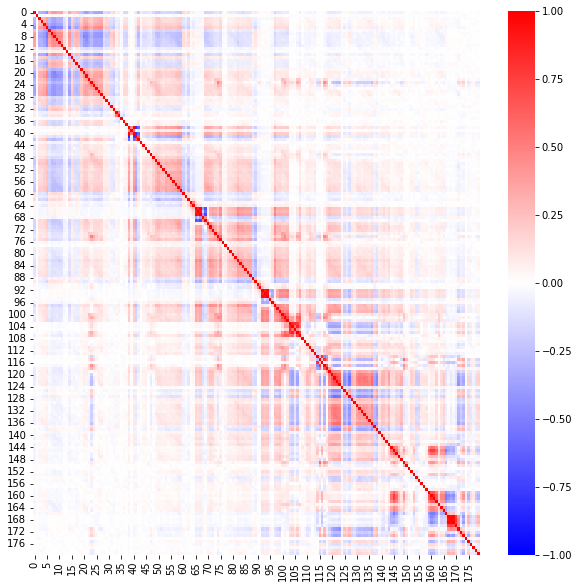

In [45]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T**2), vmin=-1, vmax=1, cmap='bwr')